In [5]:
import xgboost as xgb
from xgboost import plot_importance

import pandas as pd
import numpy as np 

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [9]:
dataset=load_breast_cancer()

In [16]:
x_features = dataset.data
y_label = dataset.target

In [18]:
cancer_df = pd.DataFrame(data=x_features, columns=dataset.feature_names)

In [20]:
cancer_df['target'] = y_label

In [21]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
cancer_df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [26]:
x = cancer_df[cancer_df.columns.difference(['target'])]

In [28]:
y = cancer_df['target']

In [29]:
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42)

In [30]:
x_train.shape

(455, 30)

In [32]:
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [34]:
params={'max_depth':3,
       'eta':0.1,
       'objective':'binary:logistic',
       'eval_metric':'logloss',
       'early_stoppings':100}

num_rounds = 400

In [35]:
wlist = [(dtrain,'train'),(dtest,'eval')]

In [37]:
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                     early_stopping_rounds=100,evals=wlist)

[16:48:42] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60961	eval-logloss:0.61363
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.54076	eval-logloss:0.54574
[2]	train-logloss:0.48404	eval-logloss:0.49427
[3]	train-logloss:0.43322	eval-logloss:0.44528
[4]	train-logloss:0.38980	eval-logloss:0.40486
[5]	train-logloss:0.35208	eval-logloss:0.36893
[6]	train-logloss:0.31943	eval-logloss:0.33821
[7]	train-logloss:0.29134	eval-logloss:0.31335
[8]	train-logloss:0.26603	eval-logloss:0.28967
[9]	train-logloss:0.24389	eval-log

[159]	train-logloss:0.00735	eval-logloss:0.09399
[160]	train-logloss:0.00733	eval-logloss:0.09410
[161]	train-logloss:0.00731	eval-logloss:0.09396
[162]	train-logloss:0.00729	eval-logloss:0.09391
[163]	train-logloss:0.00727	eval-logloss:0.09367
[164]	train-logloss:0.00724	eval-logloss:0.09366
[165]	train-logloss:0.00722	eval-logloss:0.09384
[166]	train-logloss:0.00720	eval-logloss:0.09370
[167]	train-logloss:0.00718	eval-logloss:0.09348
[168]	train-logloss:0.00716	eval-logloss:0.09334
[169]	train-logloss:0.00715	eval-logloss:0.09345
[170]	train-logloss:0.00713	eval-logloss:0.09334
[171]	train-logloss:0.00711	eval-logloss:0.09304
[172]	train-logloss:0.00709	eval-logloss:0.09304
[173]	train-logloss:0.00707	eval-logloss:0.09314
[174]	train-logloss:0.00705	eval-logloss:0.09300
[175]	train-logloss:0.00704	eval-logloss:0.09278
[176]	train-logloss:0.00702	eval-logloss:0.09274
[177]	train-logloss:0.00700	eval-logloss:0.09292
[178]	train-logloss:0.00698	eval-logloss:0.09291
[179]	train-logloss:

[327]	train-logloss:0.00541	eval-logloss:0.08754
[328]	train-logloss:0.00541	eval-logloss:0.08756
[329]	train-logloss:0.00540	eval-logloss:0.08736
[330]	train-logloss:0.00539	eval-logloss:0.08747
[331]	train-logloss:0.00539	eval-logloss:0.08735
[332]	train-logloss:0.00538	eval-logloss:0.08735
[333]	train-logloss:0.00537	eval-logloss:0.08722
[334]	train-logloss:0.00537	eval-logloss:0.08717
[335]	train-logloss:0.00536	eval-logloss:0.08728
[336]	train-logloss:0.00536	eval-logloss:0.08716
[337]	train-logloss:0.00535	eval-logloss:0.08718
[338]	train-logloss:0.00534	eval-logloss:0.08719
[339]	train-logloss:0.00534	eval-logloss:0.08719
[340]	train-logloss:0.00533	eval-logloss:0.08730
[341]	train-logloss:0.00533	eval-logloss:0.08718
[342]	train-logloss:0.00532	eval-logloss:0.08705
[343]	train-logloss:0.00532	eval-logloss:0.08701
[344]	train-logloss:0.00531	eval-logloss:0.08706
[345]	train-logloss:0.00530	eval-logloss:0.08716
[346]	train-logloss:0.00530	eval-logloss:0.08704
[347]	train-logloss:

In [38]:
pred_probs = xgb_model.predict(dtest)

In [44]:
preds = [1 if x>=0.5 else 0 for x in pred_probs ]

In [48]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score

In [49]:
confusion_matrix(y_test,preds)

array([[40,  3],
       [ 0, 71]], dtype=int64)

In [50]:
accuracy_score(y_test,preds)

0.9736842105263158

In [51]:
f1_score(y_test,preds)

0.9793103448275862

In [52]:
recall_score(y_test,preds)

1.0

In [53]:
roc_auc_score(y_test,preds)

0.9651162790697674

In [55]:
from xgboost import XGBClassifier

In [58]:
xgb_model2 = XGBClassifier(n_estimators=400,learning_rage=0.1,max_dept=3)

In [59]:
xgb_model2.fit(x_train,y_train)

[17:44:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { learning_rage, max_dept } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rage=0.1, learning_rate=0.300000012, max_delta_step=0,
              max_dept=3, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [61]:
y_pred = xgb_model2.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [64]:
f1_score(y_test,y_pred)

0.9793103448275862

In [65]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

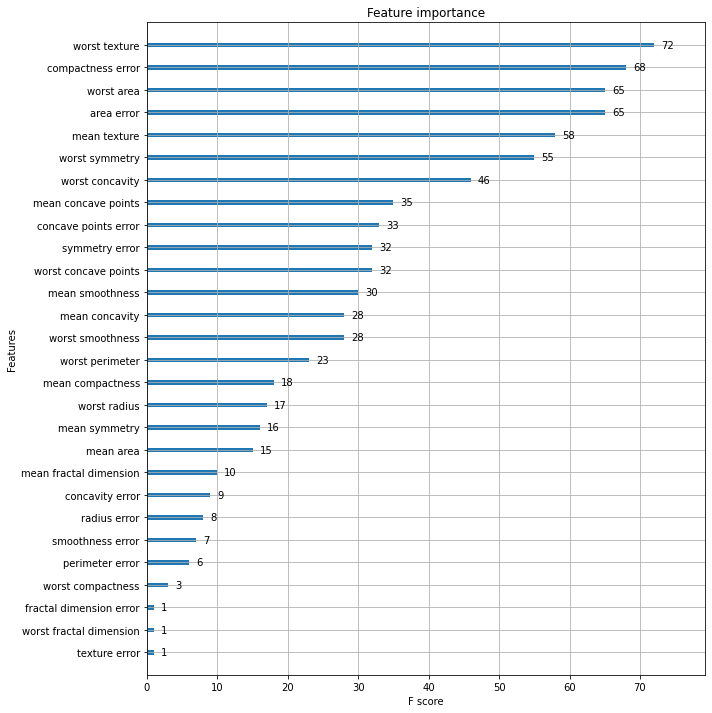

In [68]:
fig, ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax)